In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

gray_range = (190,210)

def generate_random_lines(imshape,slant,drop_length):    
    drops=[]    
    for i in range(10): ## If You want heavy rain, try increasing this        
        if slant<0:            
            x= np.random.randint(slant,imshape[1])        
        else:            
            x= np.random.randint(0,imshape[1]-slant)        
        y= np.random.randint(0,imshape[0]-drop_length)        
        drops.append((x,y))    
    return drops            
def add_rain_1(image):        
    imshape = image.shape    
    slant = np.random.gamma(4, 2)
    sign = np.random.randint(1,3)
    if sign == 1:
        slant *= -1
    drop_length= np.random.gamma(4, 2)
    drop_width= np.random.gamma(3, 1) 
    x = np.random.randint(gray_range[0],gray_range[1])
    y = np.random.randint(gray_range[0],gray_range[1]) 
    z = np.random.randint(gray_range[0],gray_range[1]) 
    drop_color=(x,y,z) ## a shade of gray    
    rain_drops= generate_random_lines(imshape,slant,drop_length) 
    for rain_drop in rain_drops:  
        flip = np.random.randint(1,3)
        if flip == 1:
            cv2.line(image,(rain_drop[0],rain_drop[1]),(int(rain_drop[0]+slant),int(rain_drop[1]+drop_length)),drop_color,np.max([1,int(drop_width)]),lineType=cv2.LINE_AA) 
        else:
            cv2.line(image,(rain_drop[0],rain_drop[1]),(int(rain_drop[0]+drop_length),int(rain_drop[1]+slant)),drop_color,np.max([1,int(drop_width)]),lineType=cv2.LINE_AA)  
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB
def add_rain_2(image):        
    imshape = image.shape    
    slant = np.random.gamma(2, 2)
    sign = np.random.randint(1,3)
    if sign == 1:
        slant *= -1
    drop_length= np.random.gamma(2, 2)
    drop_width= np.random.gamma(2, 2) 
    x = np.random.randint(gray_range[0],gray_range[1])
    y = np.random.randint(gray_range[0],gray_range[1]) 
    z = np.random.randint(gray_range[0],gray_range[1]) 
    drop_color=(x,y,z) ## a shade of gray    
    rain_drops= generate_random_lines(imshape,slant,drop_length) 
    for rain_drop in rain_drops:  
        flip = np.random.randint(1,3)
        if flip == 1:
            cv2.line(image,(rain_drop[0],rain_drop[1]),(int(rain_drop[0]+slant),int(rain_drop[1]+drop_length)),drop_color,np.max([1,int(drop_width)]),lineType=cv2.LINE_AA) 
        else:
            cv2.line(image,(rain_drop[0],rain_drop[1]),(int(rain_drop[0]+drop_length),int(rain_drop[1]+slant)),drop_color,np.max([1,int(drop_width)]),lineType=cv2.LINE_AA)  
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB
def add_rain_3(image):        
    imshape = image.shape    
    slant = np.random.gamma(1, 1)
    sign = np.random.randint(1,3)
    if sign == 1:
        slant *= -1
    drop_length= np.random.gamma(1, 1)
    drop_width= np.random.gamma(2, 1) 
    x = np.random.randint(gray_range[0],gray_range[1])
    y = np.random.randint(gray_range[0],gray_range[1]) 
    z = np.random.randint(gray_range[0],gray_range[1]) 
    drop_color=(x,y,z) ## a shade of gray    
    rain_drops= generate_random_lines(imshape,slant,drop_length) 
    for rain_drop in rain_drops:  
        flip = np.random.randint(1,3)
        if flip == 1:
            cv2.line(image,(rain_drop[0],rain_drop[1]),(int(rain_drop[0]+slant),int(rain_drop[1]+drop_length)),drop_color,np.max([1,int(drop_width)]),lineType=cv2.LINE_AA) 
        else:
            cv2.line(image,(rain_drop[0],rain_drop[1]),(int(rain_drop[0]+drop_length),int(rain_drop[1]+slant)),drop_color,np.max([1,int(drop_width)]),lineType=cv2.LINE_AA)  
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB


def center_crop(img, dim):
	"""Returns center cropped image
	Args:
	img: image to be center cropped
	dim: dimensions (width, height) to be cropped
	"""
	width, height = img.shape[1], img.shape[0]

	# process crop width and height for max available dimension
	crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
	crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] 
	mid_x, mid_y = int(width/2), int(height/2)
	cw2, ch2 = int(crop_width/2), int(crop_height/2) 
	crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
	return crop_img

def scale_image(img, factor=1):
	"""Returns resize image by scale factor.
	This helps to retain resolution ratio while resizing.
	Args:
	img: image to be scaled
	factor: scale factor to resize
	"""
	return cv2.resize(img,(int(img.shape[1]*factor), int(img.shape[0]*factor)))

In [13]:
img_number = 5
path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
img = cv2.imread(path)

In [14]:
img_new = scale_image(img, 0.32)
img_new = center_crop(img_new, (320, 320))

In [15]:
img_new.shape

(320, 320, 3)

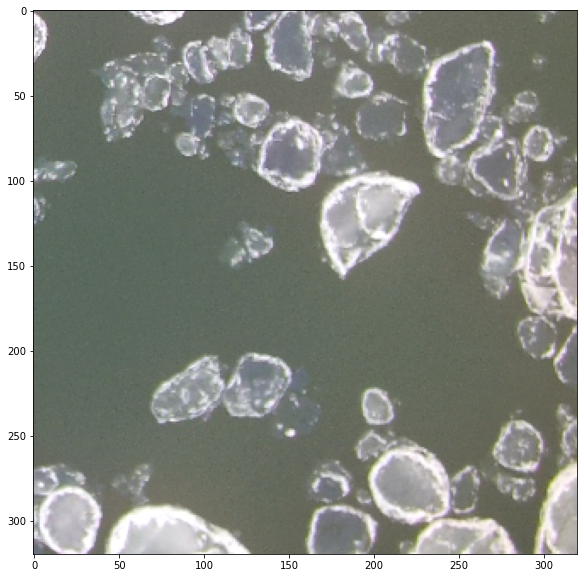

In [16]:
# img_number = 4
# path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
# img = cv2.imread(path)
# # img = plt.imread(path)

# h, w = img.shape[0], img.shape[1]
# x = center[1] - w/2
# y = center[0] - h/2

# crop_img = img[int(y):int(y+h), int(x):int(x+w)]


fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_new);

In [17]:
for _ in range(5):
    img_rain = add_rain_1(img)
for _ in range(10):
    img_rain = add_rain_2(img)
for _ in range(100):
    img_rain = add_rain_3(img)

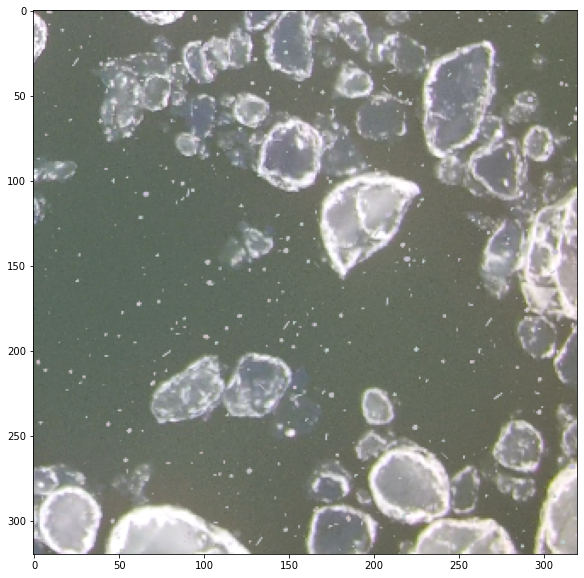

In [18]:
img_rain_new = scale_image(img_rain, 0.32)
img_rain_new = center_crop(img_rain_new, (320, 320))

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_rain_new);


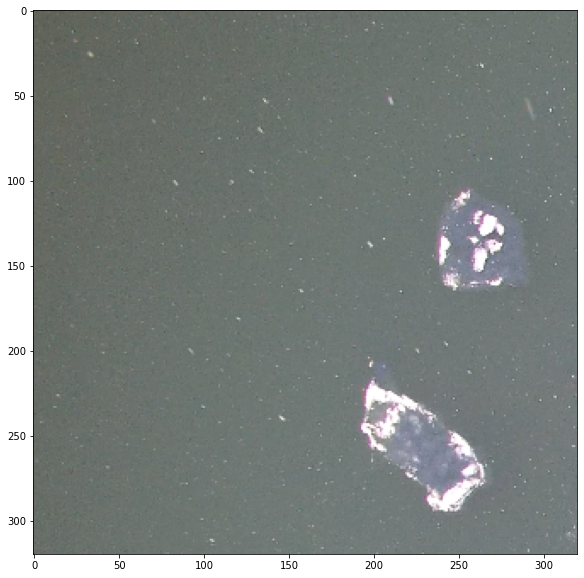

In [19]:
img_number = 20
path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
img_snow = cv2.imread(path)

img_snow_new = scale_image(img_snow, 0.32)
img_snow_new = center_crop(img_snow_new, (320, 320))

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_snow_new);

In [20]:
import matplotlib

def plot_ice(im, ax, title):
    ax.imshow(im);
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)
    ax.tick_params(axis=u'both', which=u'both',length=0);

latex = True
#plotting and colour set ups
if latex:
#     matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
#         'text.usetex': True,
        'pgf.rcfonts': False,
    })

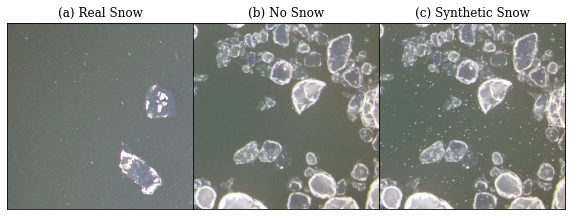

In [21]:
fig, axs = plt.subplots(1,3, figsize=(10,10))
plot_ice(img_snow_new, axs[0], '(a) Real Snow')
plot_ice(img_new, axs[1], '(b) No Snow')
plot_ice(img_rain_new, axs[2], '(c) Synthetic Snow')
fig.subplots_adjust(wspace=0, hspace=0)

In [54]:
# fig.savefig("../images/fake_snow.svg", format='svg', dpi=1200)

In [3]:
# for img_number in range(1,51):
#     path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
#     img = cv2.imread(path)
#     for _ in range(10):
#         img_rain = add_rain_2(img)
#     for _ in range(100):
#         img_rain = add_rain_3(img)
#     im = Image.fromarray(img_rain)
#     save_path = f'/home/dsola/repos/PGA-Net/data/imgs_snow/img_{img_number}.tif'
#     im.save(save_path)
#     print(f'done {img_number} of 50')

done 1 of 50
done 2 of 50
done 3 of 50
done 4 of 50
done 5 of 50
done 6 of 50
done 7 of 50
done 8 of 50
done 9 of 50
done 10 of 50
done 11 of 50
done 12 of 50
done 13 of 50
done 14 of 50
done 15 of 50
done 16 of 50
done 17 of 50
done 18 of 50
done 19 of 50
done 20 of 50
done 21 of 50
done 22 of 50
done 23 of 50
done 24 of 50
done 25 of 50
done 26 of 50
done 27 of 50
done 28 of 50
done 29 of 50
done 30 of 50
done 31 of 50
done 32 of 50
done 33 of 50
done 34 of 50
done 35 of 50
done 36 of 50
done 37 of 50
done 38 of 50
done 39 of 50
done 40 of 50
done 41 of 50
done 42 of 50
done 43 of 50
done 44 of 50
done 45 of 50
done 46 of 50
done 47 of 50
done 48 of 50
done 49 of 50
done 50 of 50


In [12]:
img_rain.shape

(1081, 1281, 3)

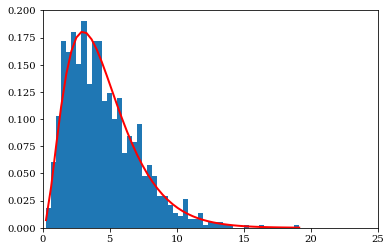

In [63]:
import numpy as np
shape, scale = 3., 1.5  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)
import matplotlib.pyplot as plt
import scipy.special as sps  
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
# plt.axis('off')
plt.xlim(0,25)
plt.ylim(0,0.2)
plt.show()

In [39]:
print(np.mean(s), np.std(s))

4.56009631226458 2.617083524713344


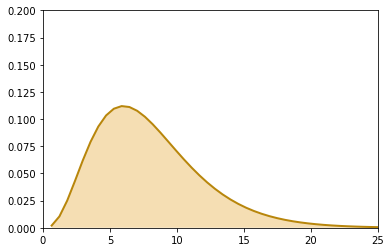

In [10]:
import numpy as np
shape, scale = 4, 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)
import matplotlib.pyplot as plt
import scipy.special as sps  
fig, ax = plt.subplots()
# count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
ax.plot(bins, y, linewidth=2, color='darkgoldenrod')  
ax.fill_between(bins, 0, y, facecolor='wheat')
# plt.axis('off')
plt.xlim(0,25)
plt.ylim(0,0.2)
plt.show()

In [8]:
print(np.mean(s), np.std(s))

1.972012416797338 1.3669699589269562


In [22]:
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

Text(0, 0.5, 'Frequency')

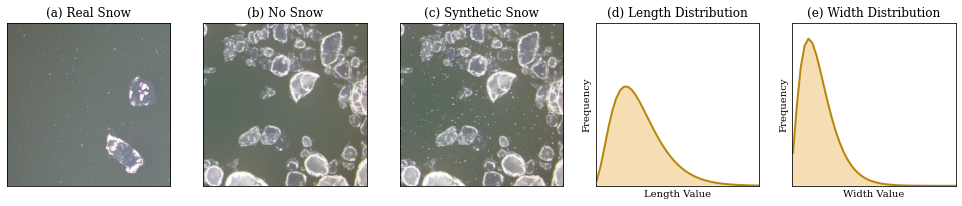

In [26]:
fig, axs = plt.subplots(1,5, figsize=(17,3))
plot_ice(img_snow_new, axs[0], '(a) Real Snow')
plot_ice(img_new, axs[1], '(b) No Snow')
plot_ice(img_rain_new, axs[2], '(c) Synthetic Snow')
# fig.subplots_adjust(wspace=0, hspace=0)

shape, scale = 3.5, 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)
# count, bins, ignored = axs[3].hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
axs[3].plot(bins, y, linewidth=2, color='darkgoldenrod') 
axs[3].fill_between(bins, 0, y, facecolor='wheat')
axs[3].set_title('(d) Length Distribution')
axs[3].set_xlim(0.5,25)
axs[3].set_ylim(0,0.2)
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[3].set_xlabel('Length Value')
axs[3].set_ylabel('Frequency')

shape, scale = 3., 1.5  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)
# count, bins, ignored = axs[4].hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
axs[4].plot(bins, y, linewidth=2, color='darkgoldenrod')
axs[4].fill_between(bins, 0, y, facecolor='wheat')
axs[4].set_title('(e) Width Distribution')
axs[4].set_xlim(0.5,25)
axs[4].set_ylim(0,0.2)
axs[4].set_xticks([])
axs[4].set_yticks([])
axs[4].set_xlabel('Width Value')
axs[4].set_ylabel('Frequency')
# plt.gca().set_aspect('equal')

In [27]:
# fig.savefig("../images/fake_snow_dist_2.svg", format='svg', dpi=1200)

In [78]:
len(axs[4].get_images())

0